# Análise Exploratória

## Questão de pesquisa 3
"Existe alguma correlação entre as regiões definidas pelos ângulos alpha e delta de um corpo celeste e a sua emissão luminosa, especificamente em relação à faixa de cor observada?"

### Bibliotecas usadas

In [7]:
#!pip install -r ../requirements.txt

In [8]:
import pandas as pd
import geopandas as gpd
from pysal.lib import weights
from pysal.explore import esda
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../data/star_classification_10_full_p.csv')

### Funções

In [10]:
def celestial_sphere_plot(df: pd.DataFrame, criterion: str, coords: tuple = ('a', 'b', 'c'), color: str = 'hot'):
    """
    Gera e exibe uma projeção gráfica dos corpos celestes na esfera celeste, usando algum critério para colori-los.
    
    :param df: Dataframe que contém as informações dos corpos celestes
    :type df: pd.DataFrame
    :param criterion: Qual das colunas será usada para diferenciar cada instância na esfera celeste
    :type criterion: str
    :param coords: Tupla contendo os valores das coordeandas tridimensional de cada isntância na esfera celeste
    :type coords: tuple
    :param color: Escala de cores a ser usada (consultar documentação do matplotlib para verificar opções)
    :type color: str
    """

    a, b, c = coords
    a = df[a]
    b = df[b]
    c = df[c]
    
    crit = df[criterion]
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(a, b, c, c=crit, cmap=color, marker='.')
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('C')
    ax.set_title(f'Instâncias em suas Coordenadas Cartesianas com Cor Baseada em {crit.name}')
    fig.colorbar(sc, label=crit.name)
    plt.show()


def spacial_cluster_correlation(gdf: gpd.GeoDataFrame, spectre: str, k: int = 5):
    """
    descrição

    :param gdf: GeoDataFrame que contém as informações dos corpos celestes
    :type gdf: gpd.GeoDataFrame
    :param spectre: Nome da variável luminosa que será avaliada
    :type spectre: str
    :param k: Valor K para o KNN
    :type k: int
    """
    W = weights.KNN.from_dataframe(gdf, k=k)
    y = gdf[spectre]
    moran = esda.Moran(y, W)

    print("Índice de Moran Global:", moran.I)
    plt.scatter(y, moran.z, alpha=0.5)
    plt.axhline(0, color='k', linestyle='--')
    plt.xlabel('Espectro Luminoso')
    plt.ylabel('Valores Padronizados de Moran')
    plt.title(f'Gráfico de Dispersão para Índice de Moran da Variavel \'{spectre}\'')
    plt.show()

### Aplicação

In [17]:
colors = ['u', 'g', 'r', 'i', 'z', 'redshift']

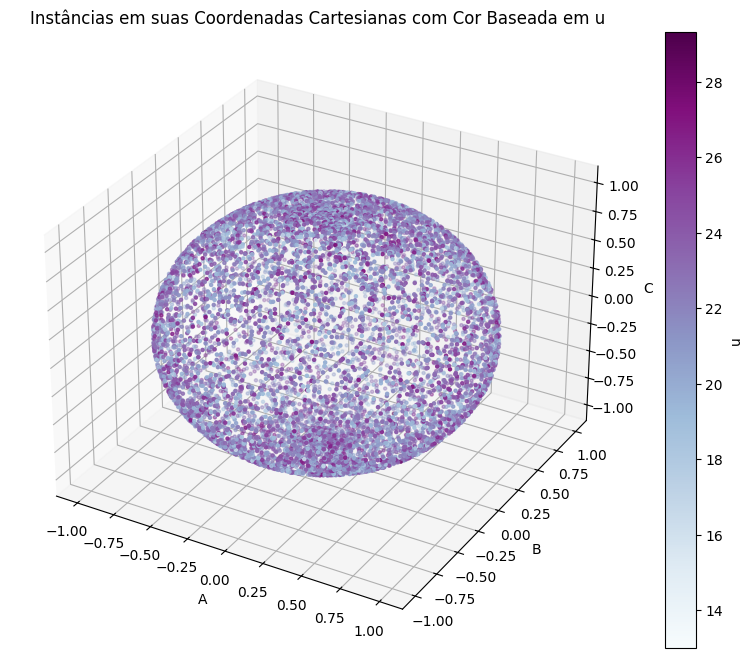

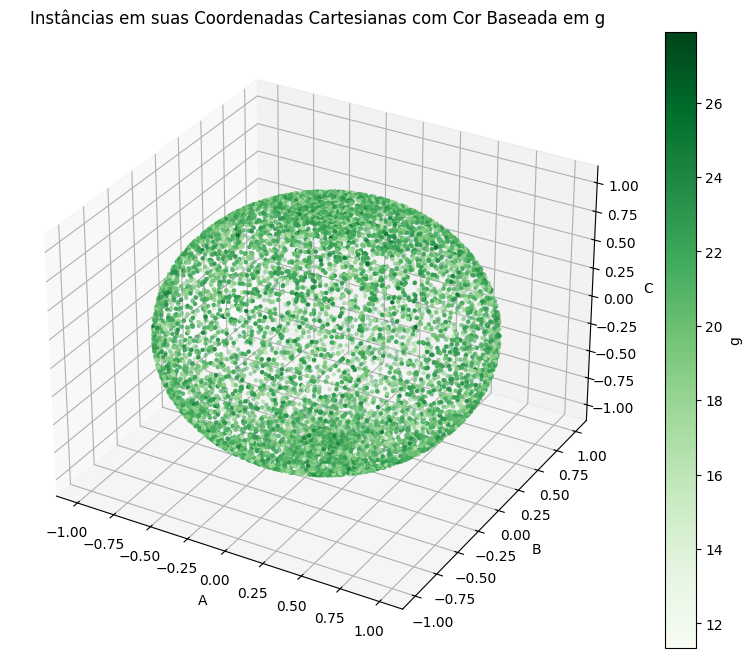

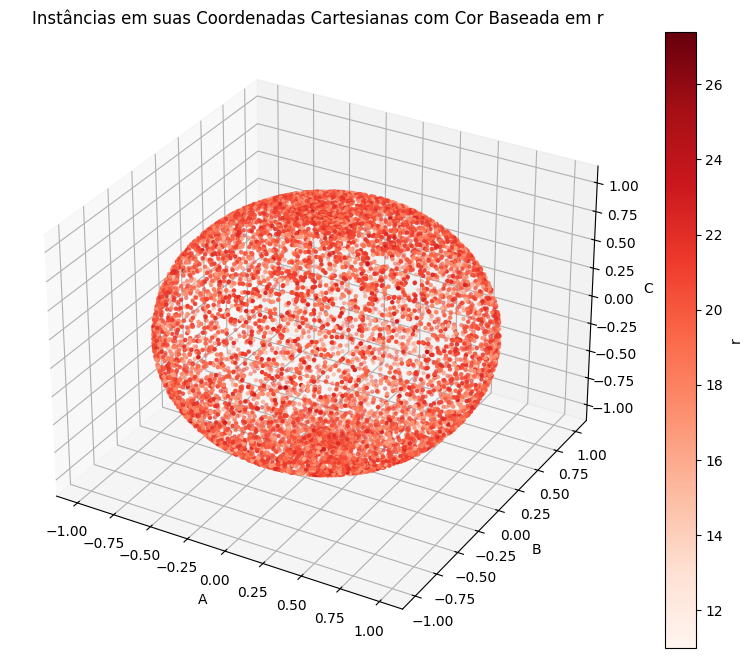

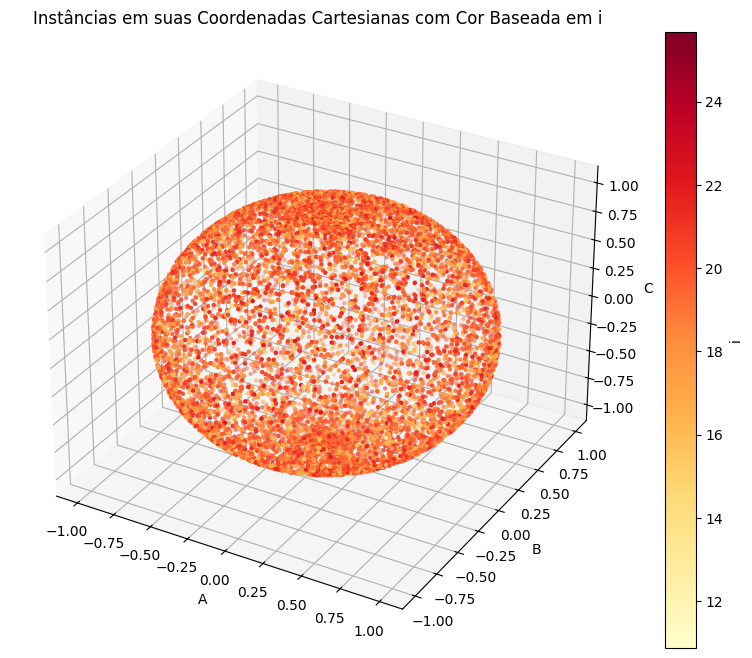

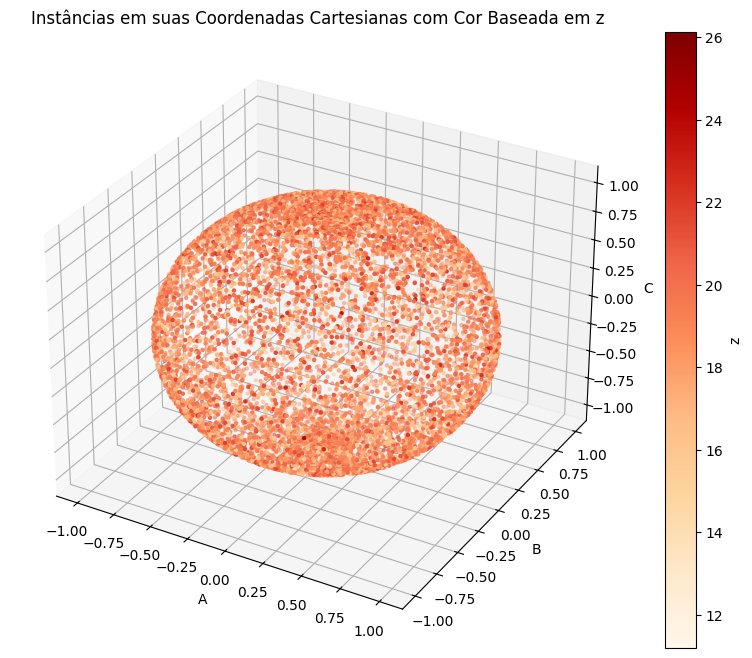

In [28]:
cmaps = ['BuPu', 'Greens', 'Reds', 'YlOrRd', 'OrRd']

for c1, c2 in zip(colors, cmaps):
    celestial_sphere_plot(df, c1, color=c2)

c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Índice de Moran Global: 0.12073104425868188


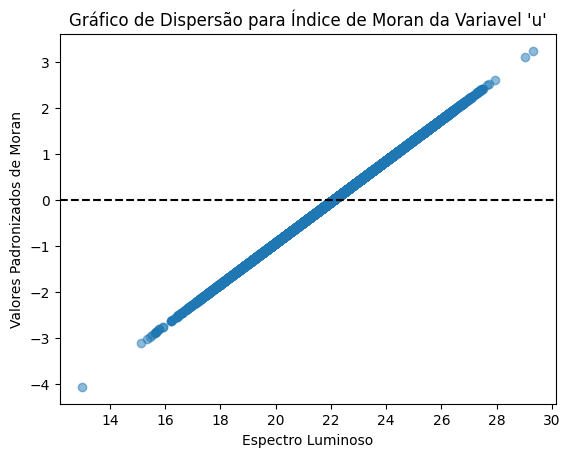

Índice de Moran Global: 0.16399503961963297


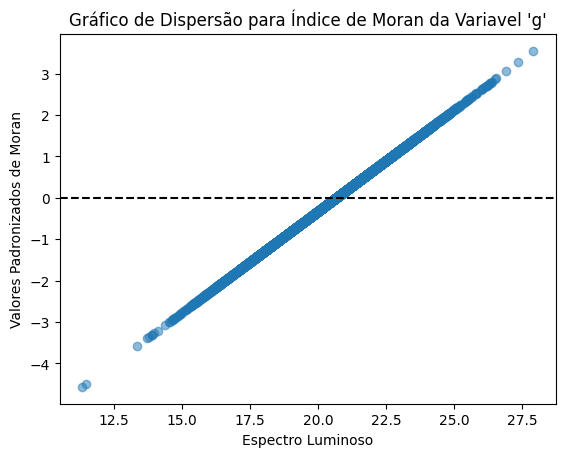

Índice de Moran Global: 0.17722529080932453


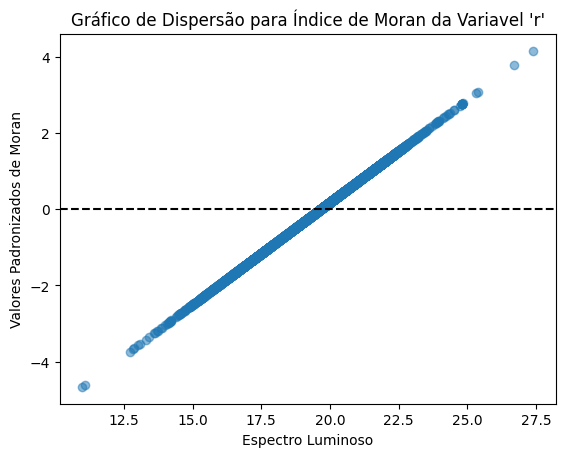

Índice de Moran Global: 0.17823226839064804


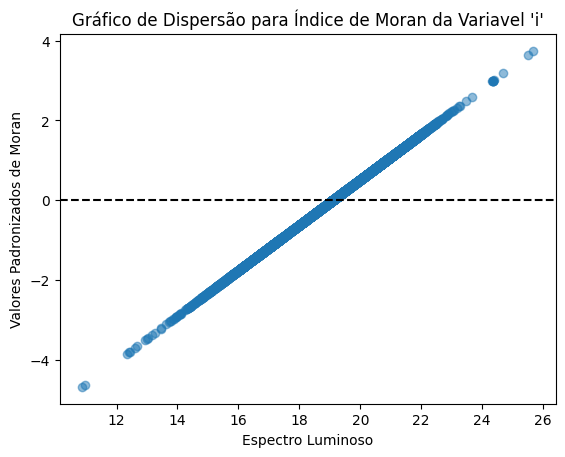

Índice de Moran Global: 0.1752488235603769


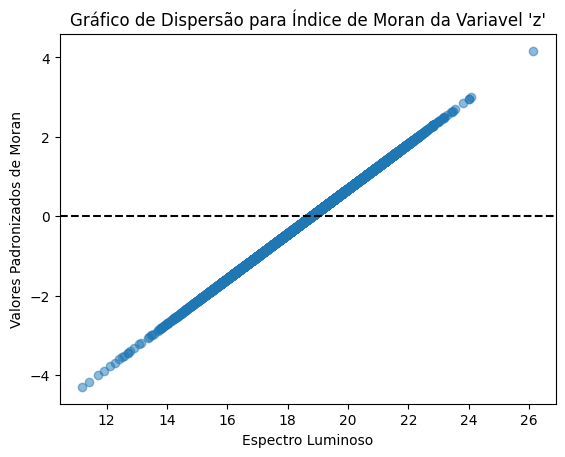

Índice de Moran Global: 0.08757855800394995


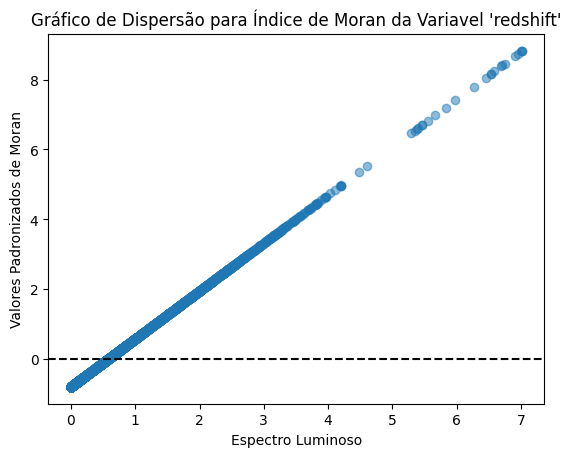

In [11]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['alpha'], df['delta']))

for c in colors:
    spacial_cluster_correlation(gdf, c)

In [13]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift,a,b,c
0,1.237663e+18,15.342907,0.794882,18.74547,17.49025,16.89122,16.57350,16.29910,GALAXY,0.042002,-0.654218,0.250033,0.713781
1,1.237664e+18,120.365538,55.660432,19.99985,19.68133,19.50156,19.17364,19.16122,QSO,1.633797,0.348727,0.525619,-0.775960
2,1.237655e+18,245.610038,42.974786,23.11792,20.81292,18.88351,18.12335,17.68182,GALAXY,0.454852,0.450750,0.286260,-0.845505
3,1.237660e+18,127.957356,6.647703,21.94454,21.01012,20.93496,20.93184,20.56855,QSO,2.608515,-0.618062,0.700648,0.356499
4,1.237665e+18,159.174526,35.881846,18.89945,17.68422,17.02925,16.60000,16.36798,GALAXY,0.083804,0.122096,-0.211234,-0.969780


In [14]:
df['a']

0      -0.654218
1       0.348727
2       0.450750
3      -0.618062
4       0.122096
          ...   
9994    0.714645
9995   -0.824252
9996    0.278924
9997    0.842645
9998    0.563495
Name: a, Length: 9999, dtype: float64

In [15]:
a, b, c = ('a', 'b', 'c')

df[a]

0      -0.654218
1       0.348727
2       0.450750
3      -0.618062
4       0.122096
          ...   
9994    0.714645
9995   -0.824252
9996    0.278924
9997    0.842645
9998    0.563495
Name: a, Length: 9999, dtype: float64